 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [43]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [44]:
whale_returns_path = Path(r"C:\Users\sergi\Downloads\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main (3)\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources/whale_returns.csv")
algo_returns_path = Path(r"C:\Users\sergi\Downloads\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main (3)\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources/algo_returns.csv")
sp_tsx_history_path = Path(r"C:\Users\sergi\Downloads\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main (3)\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources/sp_tsx_history.csv")

In [45]:
# Reading whale returns
csv_path = Path(r"C:\Users\sergi\Downloads\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main (3)\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources/whale_returns.csv")
whale_returns = pd.read_csv(csv_path)
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [46]:
whale_returns = whale_returns.set_index("Date")
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [47]:
whale_returns.isnull().mean()*100
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [48]:
whale_returns = whale_returns.dropna()

In [49]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [50]:
whale_returns = whale_returns.sort_values("Date", ascending = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [51]:
# Reading algorithmic returns
csv_path = Path(r"C:\Users\sergi\Downloads\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main (3)\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources/algo_returns.csv")
algo_returns = pd.read_csv(csv_path)
algo_returns.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [52]:
algo_returns = algo_returns.set_index("Date")
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [53]:
algo_returns = algo_returns.sort_values("Date", ascending=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [54]:
algo_returns.isnull().mean()*100
algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [55]:
algo_returns= algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [56]:
# Reading S&P TSX 60 Closing Prices
csv_path = Path(r"C:\Users\sergi\Downloads\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main (3)\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv (csv_path)
sp_tsx_history.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [57]:
sp_tsx_history = sp_tsx_history.set_index("Date")
sp_tsx_history.head()

,Close
Date,
1-Oct-2012,"$12,370.19"
2-Oct-2012,"$12,391.23"
3-Oct-2012,"$12,359.47"
4-Oct-2012,"$12,447.68"
5-Oct-2012,"$12,418.99"


In [58]:
sp_tsx_history.isnull().mean()*100
sp_tsx_history.isnull().sum()


Close    0
dtype: int64

In [59]:
# Drop nulls
sp_tsx_history = sp_tsx_history.dropna()

In [60]:
sp_tsx_history.head()


,Close
Date,
1-Oct-2012,"$12,370.19"
2-Oct-2012,"$12,391.23"
3-Oct-2012,"$12,359.47"
4-Oct-2012,"$12,447.68"
5-Oct-2012,"$12,418.99"


In [61]:
sp_tsx_history = sp_tsx_history.sort_values("Date", ascending=True)
sp_tsx_history.head()

,Close
Date,
1-Apr-2013,"$12,695.14"
1-Apr-2014,"$14,380.55"
1-Apr-2015,"$14,942.55"
1-Apr-2016,"$13,440.44"
1-Apr-2019,"$16,228.06"


In [62]:
sp_tsx_history.dtypes

Close    object
dtype: object

In [63]:
cols_to_check = ['Date' , 'Close']
print(sp_tsx_history.iloc[[0, 2]])
sp_tsx_history.iloc[[0,2]] = sp_tsx_history.iloc[[0,2]].replace({'$',""} ,regex = True)
print(sp_tsx_history)

                 Close
Date                  
1-Apr-2013  $12,695.14
1-Apr-2015  $14,942.55
                 Close
Date                  
1-Apr-2013  $12,695.14
1-Apr-2014  $14,380.55
1-Apr-2015  $14,942.55
1-Apr-2016  $13,440.44
1-Apr-2019  $16,228.06
...                ...
9-Sep-2013  $12,854.64
9-Sep-2014  $15,536.81
9-Sep-2015  $13,531.85
9-Sep-2016  $14,540.00
9-Sep-2019  $16,495.09

[1818 rows x 1 columns]


In [64]:
sp_tsx_history['Close'] = sp_tsx_history['Close'].replace('[\$,]','', regex=True).astype(float)
sp_tsx_history.tail()

,Close
Date,
9-Sep-2013,12854.64
9-Sep-2014,15536.81
9-Sep-2015,13531.85
9-Sep-2016,14540.00
9-Sep-2019,16495.09


In [65]:
sp_tsx_history['Daily_return'] = sp_tsx_history['Close'].pct_change()
print(sp_tsx_history)

               Close  Daily_return
Date                              
1-Apr-2013  12695.14           NaN
1-Apr-2014  14380.55      0.132760
1-Apr-2015  14942.55      0.039081
1-Apr-2016  13440.44     -0.100526
1-Apr-2019  16228.06      0.207405
...              ...           ...
9-Sep-2013  12854.64     -0.215217
9-Sep-2014  15536.81      0.208654
9-Sep-2015  13531.85     -0.129046
9-Sep-2016  14540.00      0.074502
9-Sep-2019  16495.09      0.134463

[1818 rows x 2 columns]


In [66]:
sp_tsx_history.tail()

,Close,Daily_return
Date,,
9-Sep-2013,12854.64,-0.215217
9-Sep-2014,15536.81,0.208654
9-Sep-2015,13531.85,-0.129046
9-Sep-2016,14540.00,0.074502
9-Sep-2019,16495.09,0.134463


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [75]:
portfolio_df = pd.concat([whale_returns, algo_returns, sp_tsx_history[['Daily_return']]], axis=1)
portfolio_df                                                                

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,NaN
...,...,...,...,...,...,...,...
9-Sep-2013,NaN,NaN,NaN,NaN,NaN,NaN,-0.215217
9-Sep-2014,NaN,NaN,NaN,NaN,NaN,NaN,0.208654
9-Sep-2015,NaN,NaN,NaN,NaN,NaN,NaN,-0.129046


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of Portfolios'}, xlabel='Date'>

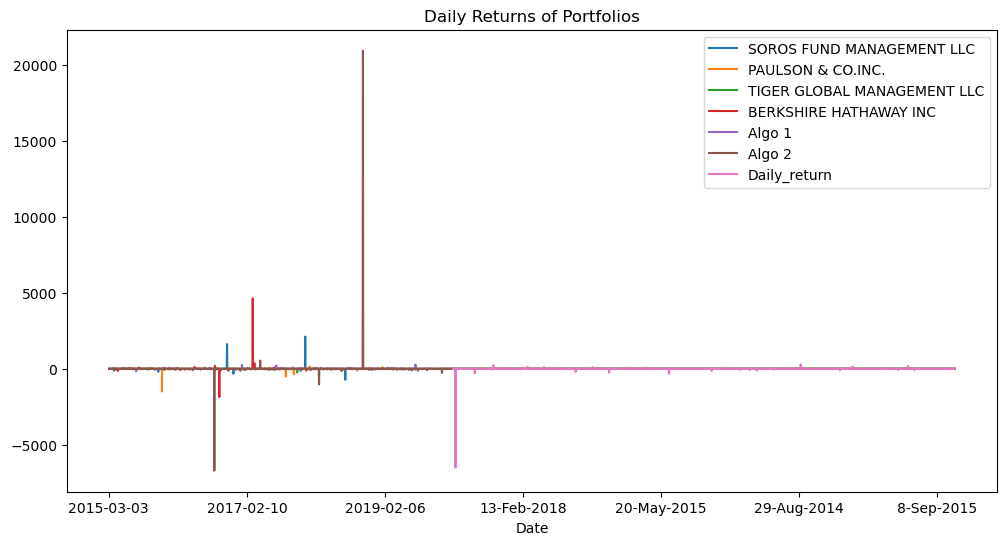

In [91]:
# Calculate daily returns of all portfolios
daily_returns = portfolio_df.pct_change()

# Plot daily returns
daily_returns.plot(figsize=(12, 6), title="Daily Returns of Portfolios")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns of Portfolios'}, xlabel='Date'>

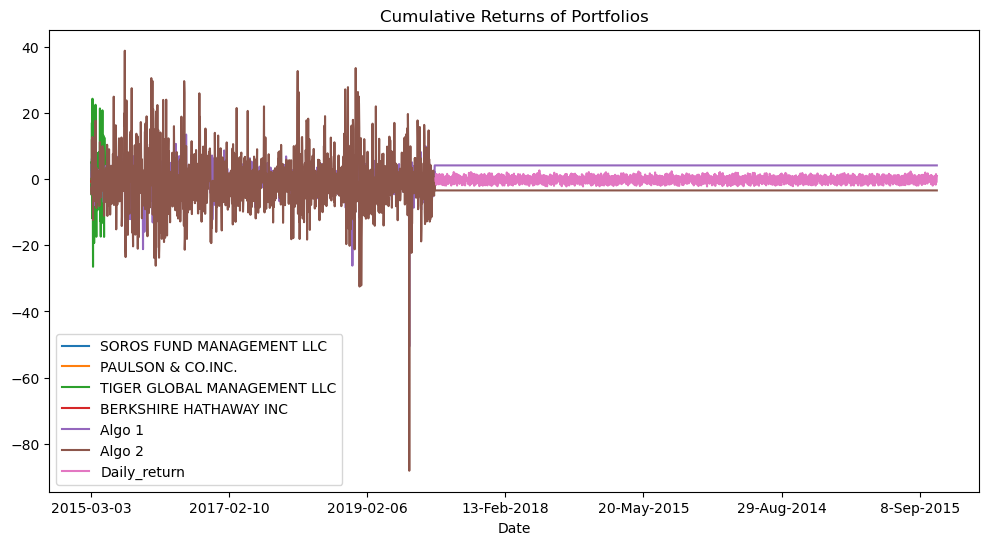

In [92]:
# Calculate cumulative returns for all portfolios
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(12, 6), title="Cumulative Returns of Portfolios")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: title={'center': 'Portfolio Risk (Box Plot)'}>

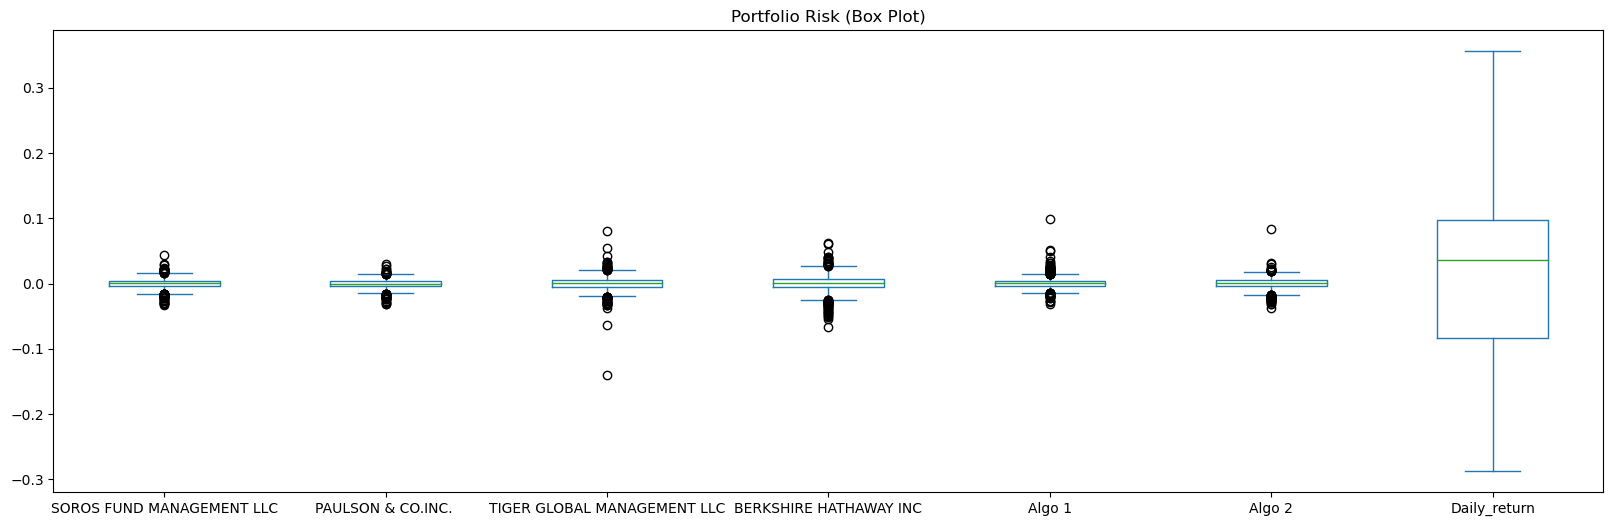

In [97]:
# Box plot to visually show risk
portfolio_df.plot.box(figsize=(20, 6), title="Portfolio Risk (Box Plot)")

### Calculate Standard Deviations

In [98]:
# Calculate the daily standard deviations of all portfolios
portfolio_std_dev = daily_returns.std()

### Determine which portfolios are riskier than the S&P TSX 60

In [99]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx_60_std_dev = daily_returns["Daily_return"].std()


In [100]:
# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios = portfolio_std_dev[portfolio_std_dev > tsx_60_std_dev]

### Calculate the Annualized Standard Deviation

In [101]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_returns.std() * np.sqrt(252)

In [102]:
annualized_std_dev

SOROS FUND MANAGEMENT LLC              NaN
PAULSON & CO.INC.                      NaN
TIGER GLOBAL MANAGEMENT LLC            NaN
BERKSHIRE HATHAWAY INC                 NaN
Algo 1                          172.358192
Algo 2                         6316.630886
Daily_return                   2436.114023
dtype: float64

In [103]:
portfolio_std_dev

SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
Algo 1                          10.857546
Algo 2                         397.910344
Daily_return                   153.460759
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [105]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = daily_returns.rolling(window=21).std()

<Axes: title={'center': 'Rolling 21-Day Standard Deviation for Portfolios'}, xlabel='Date'>

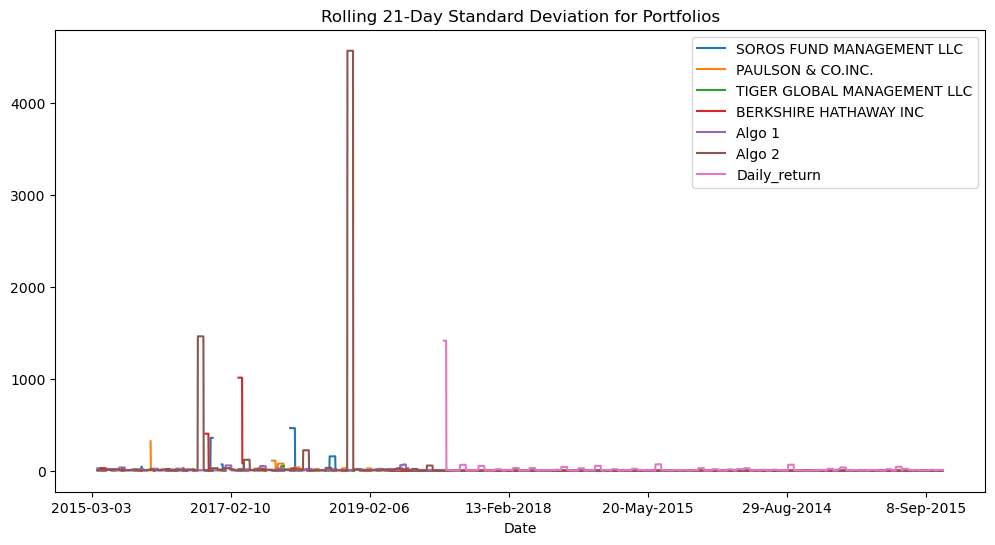

In [106]:
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(12, 6), title="Rolling 21-Day Standard Deviation for Portfolios")

### Calculate and plot the correlation

Text(0.5, 1.0, 'Correlation Matrix')

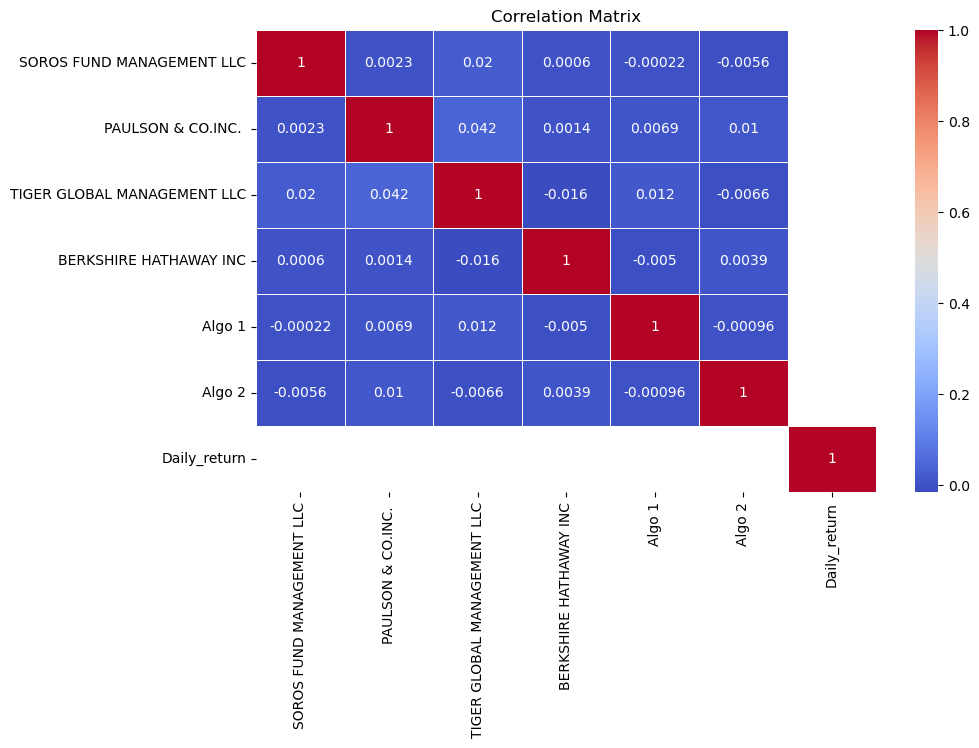

In [293]:
# Calculate the correlation
correlation_matrix = daily_returns.corr()

# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [304]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Rolling EWMA Standard Deviation for Portfolios'}, xlabel='Date'>

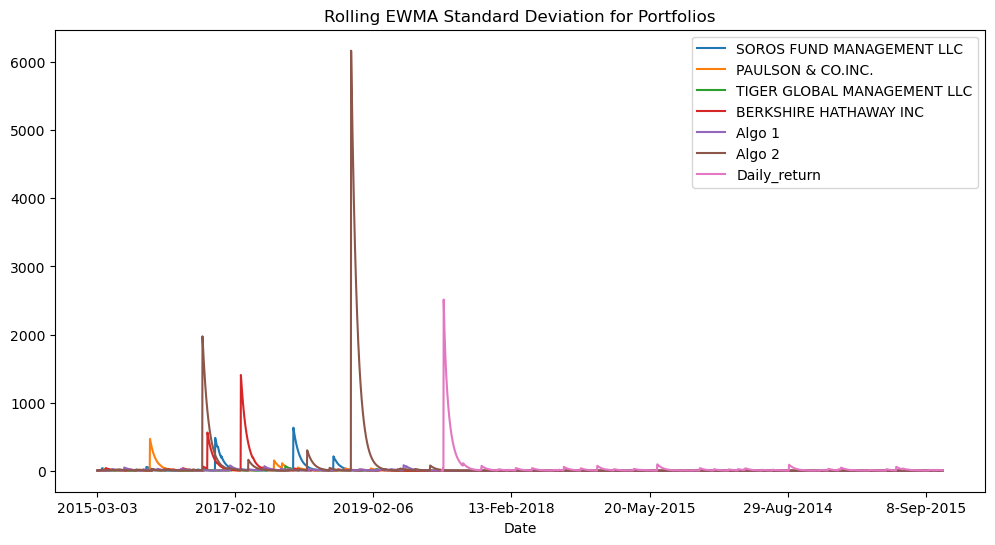

In [116]:
# Use `ewm` to calculate the rolling window
# Calculate the rolling EWMA for standard deviation with a 21-day half-life
rolling_ewma_std = daily_returns.ewm(span=21).std()

# Plot the rolling EWMA standard deviation for all portfolios
rolling_ewma_std.plot(figsize=(12, 6), title="Rolling EWMA Standard Deviation for Portfolios")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [118]:
# Calculate the daily Sharpe ratio for each portfolio
daily_sharpe_ratios = (portfolio_df.mean() / portfolio_df.std()) * np.sqrt(252)

# Calculate the annualized Sharpe ratio (252 trading days)
annualized_sharpe_ratios = daily_sharpe_ratios * np.sqrt(252)


<Axes: title={'center': 'Annualized Sharpe Ratios for Portfolios'}>

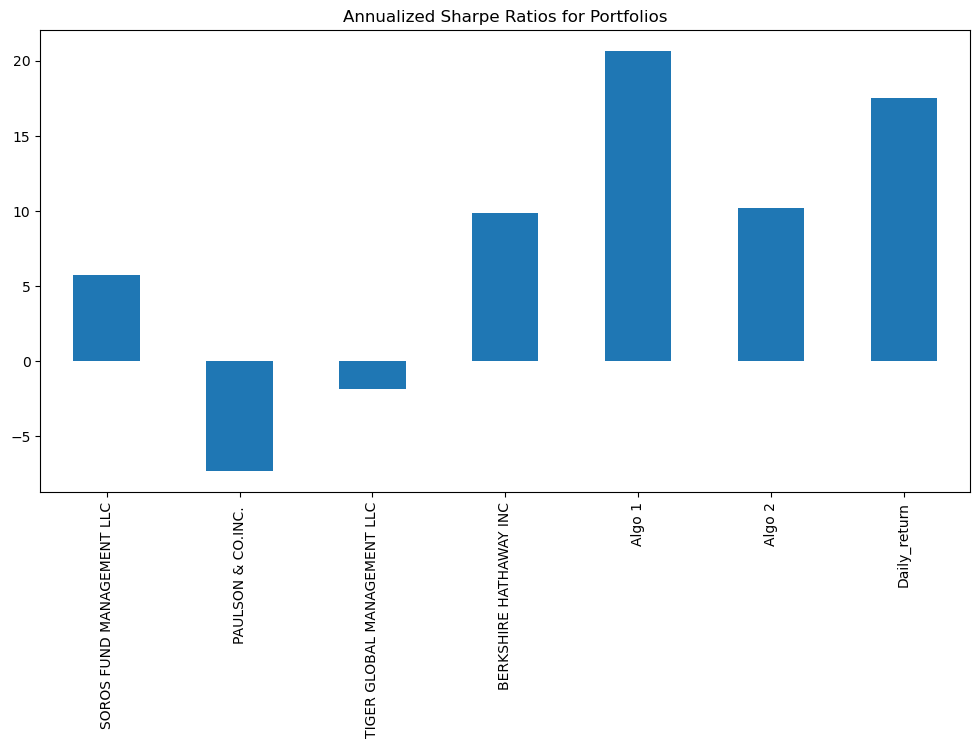

In [119]:
# Visualize the annualized Sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar", title="Annualized Sharpe Ratios for Portfolios", figsize=(12, 6))# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 outperform substantially the other strategies.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [162]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
%matplotlib inline

In [163]:
# Reading data from 1st stock
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [164]:
load_dotenv(r"C:\Users\sergi\Downloads\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main (3)\UTOR-VIRT-FIN-PT-08-2023-U-LOLC-main\05-APIs\Class 2 (Sep 11)\Activities\05-Stu_Investment_Value\Solved\example.env")

True

In [165]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [166]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [201]:
tickers = ["SPCE", "TSLA", "GOOGL"]
start_date = "2022-01-01"  
end_date = "2023-01-01"

In [202]:
custom_portfolio_df = pd.DataFrame()

In [203]:
timeframe = "1Day"
start_day = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()
end_day = pd.Timestamp("2023-01-01", tz="America/New_York").isoformat()
tickers = ["SPCE", "TSLA", "GOOGL"]

In [204]:
custom_portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_day,
    end = end_day
).df
custom_portfolio_df.head

<bound method NDFrame.head of                                open       high       low     close     volume  \
timestamp                                                                       
2022-01-03 05:00:00+00:00  2901.100  2917.0200  2874.255  2899.830    1432474   
2022-01-04 05:00:00+00:00  2907.920  2929.6978  2874.325  2887.990    1419236   
2022-01-05 05:00:00+00:00  2888.400  2889.9875  2753.760  2755.145    2551176   
2022-01-06 05:00:00+00:00  2739.970  2798.8000  2731.170  2754.950    1861789   
2022-01-07 05:00:00+00:00  2762.910  2768.9700  2715.330  2740.340    1484188   
...                             ...        ...       ...       ...        ...   
2022-12-23 05:00:00+00:00   126.370   128.6173   121.020   123.150  167075232   
2022-12-27 05:00:00+00:00   117.495   119.6700   108.760   109.100  208643493   
2022-12-28 05:00:00+00:00   110.350   116.2700   108.240   112.710  221244165   
2022-12-29 05:00:00+00:00   120.385   123.5700   117.495   121.820  221925423  

In [207]:
SPCE = custom_portfolio_df[custom_portfolio_df['symbol']=='SPCE'].drop('symbol', axis=1)
TSLA = custom_portfolio_df[custom_portfolio_df['symbol']=='TSLA'].drop('symbol', axis=1)
GOOGL = custom_portfolio_df[custom_portfolio_df['symbol']=='GOOGL'].drop('symbol', axis=1)
custom_portfolio_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-01-03 05:00:00+00:00,2901.10,2917.0200,2874.255,2899.830,1432474,103304,2899.407135,GOOGL
2022-01-04 05:00:00+00:00,2907.92,2929.6978,2874.325,2887.990,1419236,102588,2894.436738,GOOGL
2022-01-05 05:00:00+00:00,2888.40,2889.9875,2753.760,2755.145,2551176,198847,2803.927180,GOOGL
2022-01-06 05:00:00+00:00,2739.97,2798.8000,2731.170,2754.950,1861789,137468,2767.178540,GOOGL
2022-01-07 05:00:00+00:00,2762.91,2768.9700,2715.330,2740.340,1484188,111402,2741.782771,GOOGL


In [219]:
# Drop NAs
custom_portfolio_df.dropna(inplace=True)

In [220]:
print(custom_portfolio_df.head())

                  timestamp     open       high       low     close   volume  \
0 2022-01-03 05:00:00+00:00  2901.10  2917.0200  2874.255  2899.830  1432474   
1 2022-01-04 05:00:00+00:00  2907.92  2929.6978  2874.325  2887.990  1419236   
2 2022-01-05 05:00:00+00:00  2888.40  2889.9875  2753.760  2755.145  2551176   
3 2022-01-06 05:00:00+00:00  2739.97  2798.8000  2731.170  2754.950  1861789   
4 2022-01-07 05:00:00+00:00  2762.91  2768.9700  2715.330  2740.340  1484188   

   trade_count         vwap symbol  
0       103304  2899.407135  GOOGL  
1       102588  2894.436738  GOOGL  
2       198847  2803.927180  GOOGL  
3       137468  2767.178540  GOOGL  
4       111402  2741.782771  GOOGL  


In [250]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio_df = pd.concat([SPCE, TSLA, GOOGL],axis=1, keys=["SPCE", "TSLA", "GOOGL"])

# Display sample data
custom_portfolio_df

SPCE                                    \
                            open     high     low  close    volume   
timestamp                                                            
2022-01-03 05:00:00+00:00  13.48  13.7350  12.890  13.54  12478841   
2022-01-04 05:00:00+00:00  13.64  13.6499  12.895  13.21  12804838   
2022-01-05 05:00:00+00:00  13.02  13.3300  11.980  12.05  16670390   
2022-01-06 05:00:00+00:00  12.17  12.3464  11.300  11.78  16044287   
2022-01-07 05:00:00+00:00  12.00  12.8050  11.920  12.45  15896231   
...                          ...      ...     ...    ...       ...   
2022-12-23 05:00:00+00:00   3.73   3.7600   3.550   3.65   5334032   
2022-12-27 05:00:00+00:00   3.62   3.6200   3.280   3.29   7591079   
2022-12-28 05:00:00+00:00   3.32   3.3800   3.250   3.32   6118589   
2022-12-29 05:00:00+00:00   3.34   3.5000   3.245   3.42   6893487   
2022-12-30 05:00:00+00:00   3.38   3.4900   3.330   3.48   6349232   

                                                      TSLA             \
                          trade_count       vwap      open       high   
timestamp                                                               
2022-01-03 05:00:00+00:00       78261  13.356530  1147.750  1201.0700   
2022-01-04 05:00:00+00:00       80430  13.099459  1189.550  1208.0000   
2022-01-05 05:00:00+00:00      117126  12.511801  1146.650  1170.3400   
2022-01-06 05:00:00+00:00      101017  11.859026  1077.000  1088.0000   
2022-01-07 05:00:00+00:00       97693  12.511643  1080.370  1080.9299   
...                               ...        ...       ...        ...   
2022-12-23 05:00:00+00:00       21016   3.632365   126.370   128.6173   
2022-12-27 05:00:00+00:00       31264   3.410278   117.495   119.6700   
2022-12-28 05:00:00+00:00       23848   3.305328   110.350   116.2700   
2022-12-29 05:00:00+00:00       28777   3.407887   120.385   123.5700   
2022-12-30 05:00:00+00:00       24872   3.418119   119.950   124.4800   

                                      ...                                      \
                                 low  ...     volume trade_count         vwap   
timestamp                             ...                                       
2022-01-03 05:00:00+00:00  1136.0400  ...   34890336     1162659  1170.754238   
2022-01-04 05:00:00+00:00  1123.0500  ...   33512632     1051348  1162.182187   
2022-01-05 05:00:00+00:00  1081.0101  ...   26748880      810846  1126.646002   
2022-01-06 05:00:00+00:00  1020.5000  ...   30134340      880379  1060.305232   
2022-01-07 05:00:00+00:00  1010.0000  ...   28053117      823207  1039.254771   
...                              ...  ...        ...         ...          ...   
2022-12-23 05:00:00+00:00   121.0200  ...  167075232     1560091   123.918784   
2022-12-27 05:00:00+00:00   108.7600  ...  208643493     2057258   113.445314   
2022-12-28 05:00:00+00:00   108.2400  ...  221244165     2046314   111.945593   
2022-12-29 05:00:00+00:00   117.4950  ...  221925423     1902589   120.553895   
2022-12-30 05:00:00+00:00   119.7500  ...  157730398     1506289   122.133764   

                              GOOGL                                           \
                               open       high       low     close    volume   
timestamp                                                                      
2022-01-03 05:00:00+00:00  2901.100  2917.0200  2874.255  2899.830   1432474   
2022-01-04 05:00:00+00:00  2907.920  2929.6978  2874.325  2887.990   1419236   
2022-01-05 05:00:00+00:00  2888.400  2889.9875  2753.760  2755.145   2551176   
2022-01-06 05:00:00+00:00  2739.970  2798.8000  2731.170  2754.950   1861789   
2022-01-07 05:00:00+00:00  2762.910  2768.9700  2715.330  2740.340   1484188   
...                             ...        ...       ...       ...       ...   
2022-12-23 05:00:00+00:00    87.110    89.5450    87.070    89.230  23003035   
2022-12-27 05:00:00+00:00    88.795    88.9400    87.010    87.390  20227335   
2022-12-2

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [247]:
# Set equal weights for each stock (1/3 each)
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_df['Portfolio_Return'] = (SPCE['close'].pct_change() * weights[0] +
                                           TSLA['close'].pct_change() * weights[1] +
                                           GOOGL['close'].pct_change() * weights[2])

# Display sample data
custom_portfolio_df.head()

SPCE                                    \
                            open     high     low  close    volume   
timestamp                                                            
2022-01-03 05:00:00+00:00  13.48  13.7350  12.890  13.54  12478841   
2022-01-04 05:00:00+00:00  13.64  13.6499  12.895  13.21  12804838   
2022-01-05 05:00:00+00:00  13.02  13.3300  11.980  12.05  16670390   
2022-01-06 05:00:00+00:00  12.17  12.3464  11.300  11.78  16044287   
2022-01-07 05:00:00+00:00  12.00  12.8050  11.920  12.45  15896231   

                                                     TSLA             \
                          trade_count       vwap     open       high   
timestamp                                                              
2022-01-03 05:00:00+00:00       78261  13.356530  1147.75  1201.0700   
2022-01-04 05:00:00+00:00       80430  13.099459  1189.55  1208.0000   
2022-01-05 05:00:00+00:00      117126  12.511801  1146.65  1170.3400   
2022-01-06 05:00:00+00:00      101017  11.859026  1077.00  1088.0000   
2022-01-07 05:00:00+00:00       97693  12.511643  1080.37  1080.9299   

                                      ...                             GOOGL  \
                                 low  ... trade_count         vwap     open   
timestamp                             ...                                     
2022-01-03 05:00:00+00:00  1136.0400  ...     1162659  1170.754238  2901.10   
2022-01-04 05:00:00+00:00  1123.0500  ...     1051348  1162.182187  2907.92   
2022-01-05 05:00:00+00:00  1081.0101  ...      810846  1126.646002  2888.40   
2022-01-06 05:00:00+00:00  1020.5000  ...      880379  1060.305232  2739.97   
2022-01-07 05:00:00+00:00  1010.0000  ...      823207  1039.254771  2762.91   

                                                                               \
                                high       low     close   volume trade_count   
timestamp                                                                       
2022-01-03 05:00:00+00:00  2917.0200  2874.255  2899.830  1432474      103304   
2022-01-04 05:00:00+00:00  2929.6978  2874.325  2887.990  1419236      102588   
2022-01-05 05:00:00+00:00  2889.9875  2753.760  2755.145  2551176      198847   
2022-01-06 05:00:00+00:00  2798.8000  2731.170  2754.950  1861789      137468   
2022-01-07 05:00:00+00:00  2768.9700  2715.330  2740.340  1484188      111402   

                                       Portfolio_Return  
                                  vwap                   
timestamp                                                
2022-01-03 05:00:00+00:00  2899.407135              NaN  
2022-01-04 05:00:00+00:00  2894.436738        -0.023429  
2022-01-05 05:00:00+00:00  2803.927180        -0.062428  
2022-01-06 05:00:00+00:00  2767.178540        -0.014667  
2022-01-07 05:00:00+00:00  2741.782771         0.005375  

[5 rows x 22 columns]

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [261]:
custom_portfolio_df.dropna(inplace=True)
custom_portfolio_df.isnull().sum()

SPCE   open           0
       high           0
       low            0
       close          0
       volume         0
       trade_count    0
       vwap           0
TSLA   open           0
       high           0
       low            0
       close          0
       volume         0
       trade_count    0
       vwap           0
GOOGL  open           0
       high           0
       low            0
       close          0
       volume         0
       trade_count    0
       vwap           0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [264]:
# Calculate the standard deviation of daily returns
daily_std = custom_portfolio_df.std()

trading_days_per_year = 252

# Calculate the annualized standard deviation
annualized_std = daily_std * (trading_days_per_year ** 0.5)

print("Annualized Standard Deviation:", annualized_std)


Annualized Standard Deviation: SPCE   open           3.199670e+01
       high           3.326940e+01
       low            3.033036e+01
       close          3.181574e+01
       volume         2.216055e+08
       trade_count    9.224935e+05
       vwap           3.182544e+01
TSLA   open           5.222003e+03
       high           5.351409e+03
       low            5.069498e+03
       close          5.203963e+03
       volume         6.190924e+08
       trade_count    4.981702e+06
       vwap           5.209677e+03
GOOGL  open           1.939063e+04
       high           1.964884e+04
       low            1.908535e+04
       close          1.935007e+04
       volume         2.565658e+08
       trade_count    2.080276e+06
       vwap           1.936367e+04
dtype: float64


### Calculate and plot rolling `std` with 21-day window

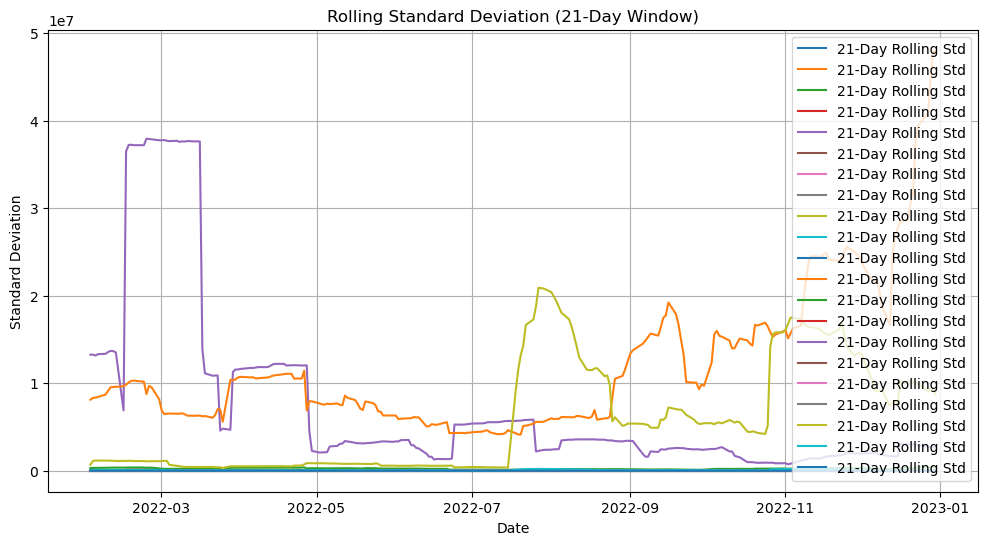

In [267]:
# Calculate rolling standard deviation
rolling_std = custom_portfolio_df.rolling(window=21).std()
# Plot rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(rolling_std.index, rolling_std, label="21-Day Rolling Std")
plt.title("Rolling Standard Deviation (21-Day Window)")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.legend()
plt.grid(True)
plt.show()

### Calculate and plot the correlation

In [268]:
# Calculate and plot the correlation
correlation_matrix = portfolio_df.corr()

In [270]:
portfolio_df.corr

<bound method DataFrame.corr of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
9-Sep-2013                        NaN                 NaN   
9-Sep-2014                        NaN                 NaN   
9-Sep-2015                        NaN                 NaN   
9-Sep-2016                        NaN                 NaN   
9-Sep-2019                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03          

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [285]:

risk_free_rate = 0.01

In [286]:
portfolio_excess_returns = portfolio_df - risk_free_rate

In [287]:
mean_daily_excess_returns = portfolio_excess_returns.mean()
std_dev_daily_excess_returns = portfolio_excess_returns.std()

In [288]:
trading_days_per_year = 252  # Assuming 252 trading days in a year
sharpe_ratios = (mean_daily_excess_returns * trading_days_per_year) / (std_dev_daily_excess_returns * np.sqrt(trading_days_per_year))

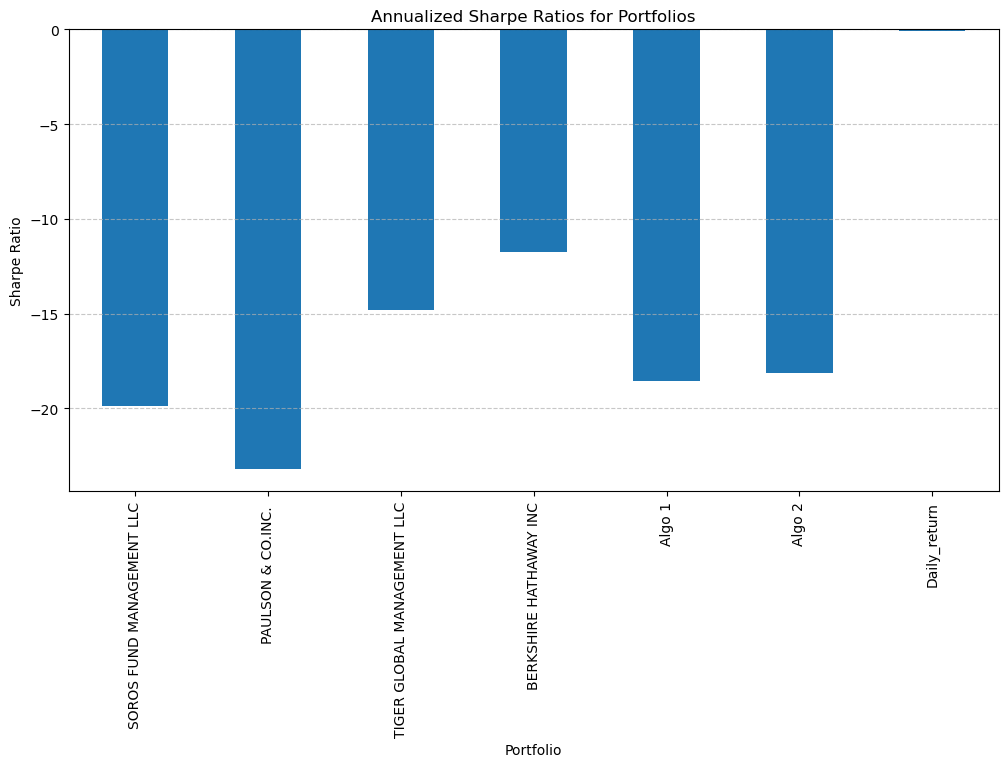

In [289]:
plt.figure(figsize=(12, 6))
sharpe_ratios.plot(kind='bar', title='Annualized Sharpe Ratios for Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()